In [74]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Introduction 
"""
# OpenSponsorship Data Analysis
This notebook presents an analysis of the OpenSponsorship brand data.
We aim to explore the dataset, analyze the underlying trends, 
and identify the factors that influence the success of customer subscriptions.
"""

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [76]:
# Load all sheets of an Excel file into a dictionary of dataframes
all_sheets_df = pd.read_excel("sample_brands.xlsx", sheet_name=None)

# Data Loading and Preprocessing (Markdown)
"""
## Data Loading and Preprocessing
In this section, we load the dataset from the Excel file and preprocess it by calculating active durations and cleaning up the roles.
"""

In [77]:
# Get the dataframe from the 'data' sheet
brands_data_df = all_sheets_df['data']
brands_data_df.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,country
0,1,2021-08-31 19:18:39.918,2021-08-31 19:20:37.909,0,1,brand,[],NaN,NaN,NaN,NaN
1,2,2020-08-28 04:38:10.949,2021-01-07 21:10:32.347,0,1,brand,[],NaN,NaN,4.0,United States
2,3,2020-08-21 13:55:13.203,2020-10-28 12:53:30.858,0,1,brand,[],NaN,NaN,4.0,NaN
3,4,2021-07-01 16:46:16.389,2021-07-01 16:46:59.258,0,1,founder,[],NaN,NaN,2.0,United States
4,5,2019-12-02 21:57:51.215,2019-12-20 17:35:40.591,0,1,brand,[],NaN,NaN,4.0,India


In [78]:
# Create a new column 'active_duration' as the difference between 'lastActive' and 'created' in days
brands_data_df['active_duration'] = (brands_data_df['lastActive'] - brands_data_df['created']).dt.days

# Check for missing data
print(brands_data_df.isnull().sum())

brand_id                  0
created                   0
lastActive                8
planLevel                 0
num_sub_user              0
role                      6
industry_categories      23
bantScore              4544
companySize            3433
onboarding_stage        239
country                1004
active_duration           8
dtype: int64


The bantScore and companySize fields have a significant number of missing values. Before we decide how to handle these missing values, let's perform some exploratory data analysis (EDA) to understand the distribution of our data.

We can start by checking the distribution of the planLevel field, which is our target variable, as it indicates whether a brand has a free, trial, or paid subscription. This will give us an idea of how many brands have upgraded to a paid subscription.

Let's also check the distribution of other categorical variables like role, industry_categories, companySize, and country. For the numerical variables, we can look at summary statistics.

Furthermore, we can also calculate the active duration of a brand (i.e., the time difference between lastActive and created dates). This might give us some insights into customer engagement.

Handling of missing data depends on the data context and the analysis objectives. For example, if a column has a large proportion of missing data, it may be excluded from the analysis. If a column has a small proportion of missing data, it might be imputed using a suitable strategy or the rows with missing data might be removed.

# Exploratory Data Analysis (Markdown)
"""
## Exploratory Data Analysis
In this section, we perform an exploratory analysis of the dataset. 
We look at the distribution of various features and how they relate to the subscription plan level.
"""


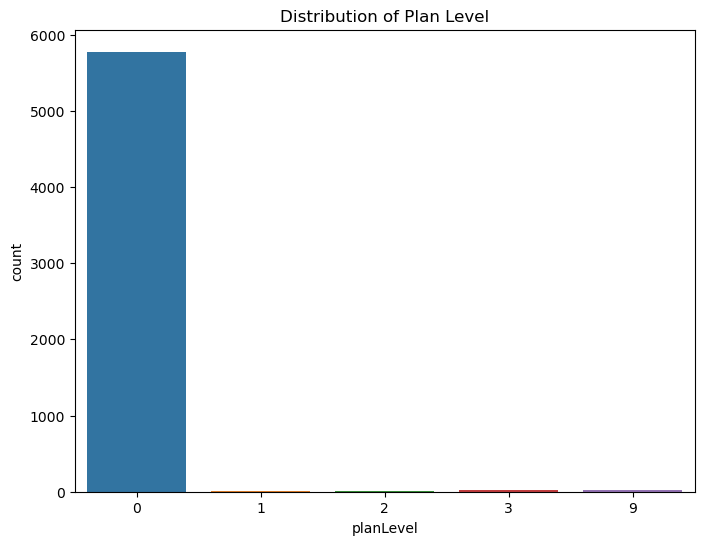

       num_sub_user    bantScore  onboarding_stage  active_duration
count   5839.000000  1295.000000       5600.000000      5831.000000
mean       1.063196    67.778378          3.524107        33.771566
std        0.457079    16.562406          1.120587        97.853543
min        1.000000     1.000000          0.000000         0.000000
25%        1.000000    56.000000          4.000000         0.000000
50%        1.000000    69.000000          4.000000         0.000000
75%        1.000000    81.000000          4.000000         6.000000
max       14.000000   100.000000         12.000000       992.000000


In [79]:
# Plot the distribution of the target variable 'planLevel'
plt.figure(figsize=(8, 6))
sns.countplot(x='planLevel', data=brands_data_df)
plt.title('Distribution of Plan Level')
plt.show()

# Display the summary statistics for numerical variables
print(brands_data_df[['num_sub_user', 'bantScore', 'onboarding_stage', 'active_duration']].describe())


Summary Statistics:

• num_sub_user: Most brands have only one user that can access their account, as indicated by an average of approximately 1.06 users per account. The maximum number of users for a single brand account is 14.

• bantScore: This field, which represents a brand's readiness to buy based on the BANT (Budget, Authority, Need, Timeframe) framework, has a lot of missing data (4544 out of 5839 records). For the non-missing values, the scores range from 1 to 100, with an average score of about 67.78.

• onboarding_stage: Most brands are in the 4th stage of onboarding, with an average stage of approximately 3.52. The maximum stage reached is 12. There are 239 missing values in this field.

• active_duration: The active duration of brands (i.e., the number of days between account creation and the last activity) varies widely, from 0 to 992 days, with an average duration of about 33.77 days. However, the median active duration is 0 days, indicating that more than half of the brands were not active after the account creation day

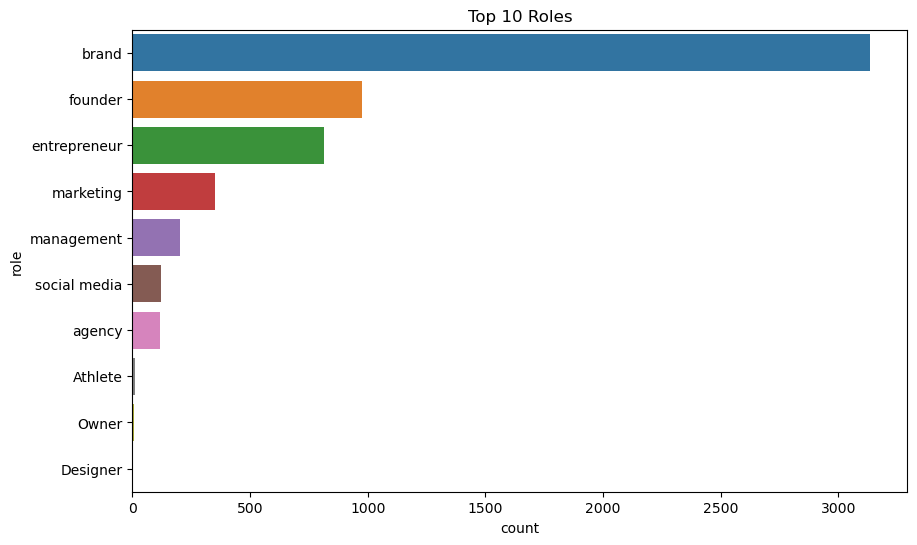

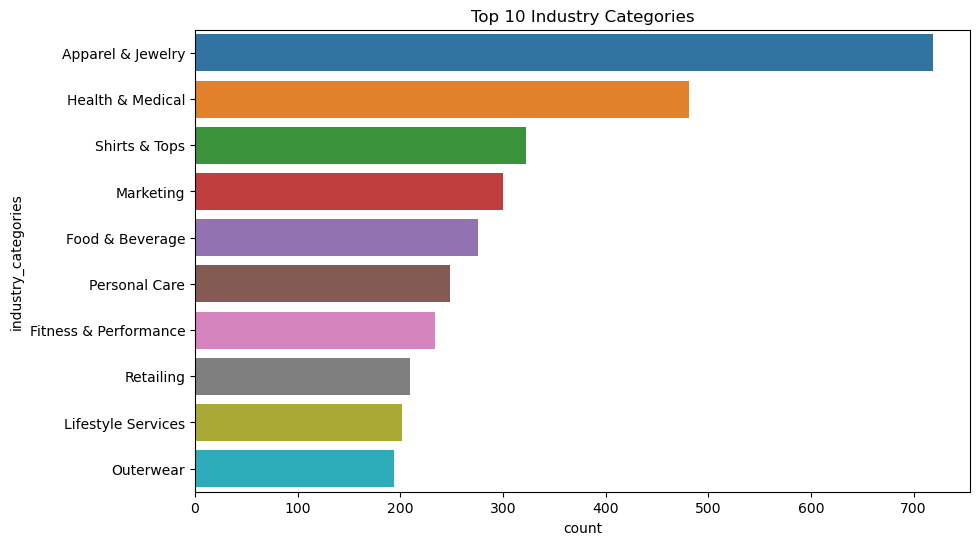

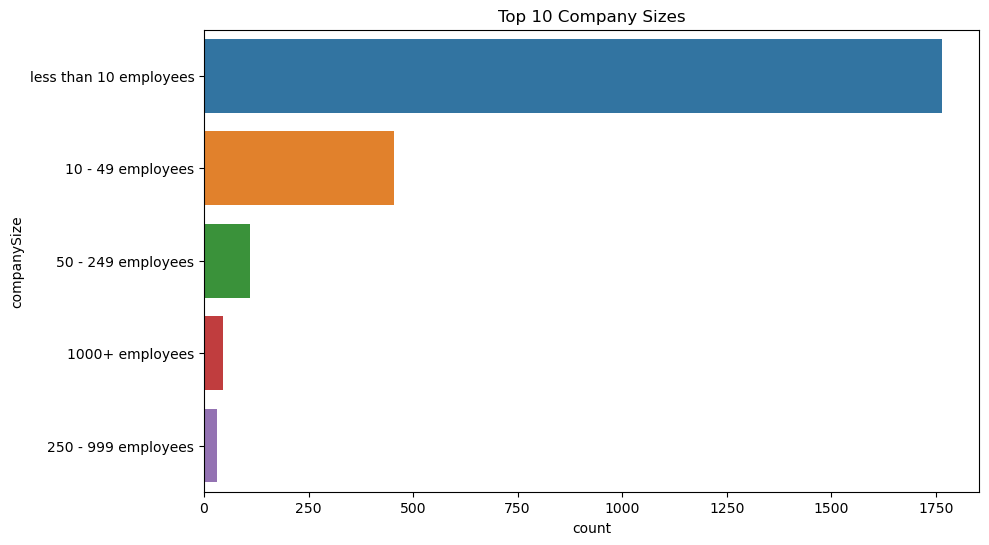

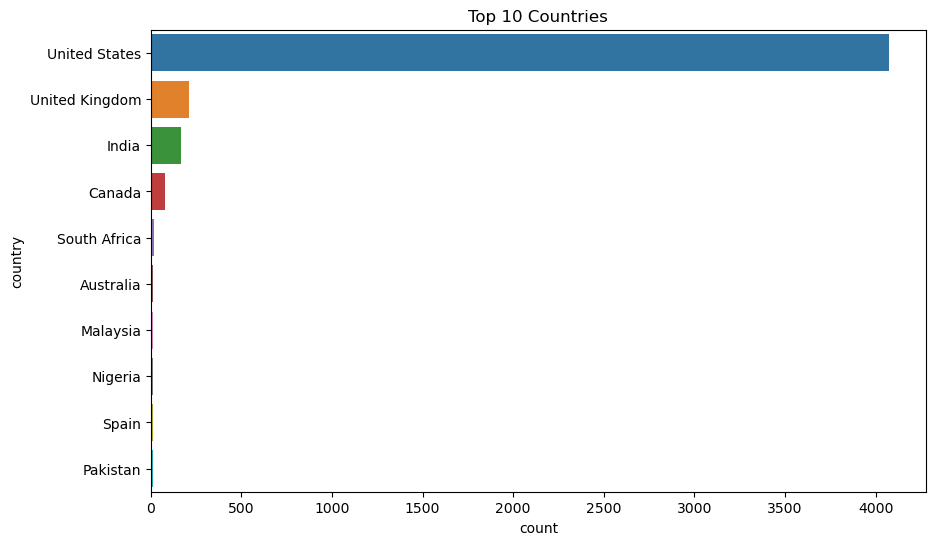

In [80]:
# Replace NaNs in 'industry_categories' with an empty list
brands_data_df['industry_categories'] = brands_data_df['industry_categories'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Create a new dataframe where each industry category of a brand is in a separate row
industry_categories_df = brands_data_df.explode('industry_categories')

# Now, let's plot the distributions of the categorical variables

# Plot the distribution of 'role'
plt.figure(figsize=(10, 6))
sns.countplot(y='role', data=brands_data_df, order=brands_data_df['role'].value_counts().iloc[:10].index)
plt.title('Top 10 Roles')
plt.show()

# Plot the top 10 'industry_categories'
plt.figure(figsize=(10, 6))
sns.countplot(y='industry_categories', data=industry_categories_df, order=industry_categories_df['industry_categories'].value_counts().iloc[:10].index)
plt.title('Top 10 Industry Categories')
plt.show()

# Plot the top 10 'companySize'
plt.figure(figsize=(10, 6))
sns.countplot(y='companySize', data=brands_data_df, order=brands_data_df['companySize'].value_counts().iloc[:10].index)
plt.title('Top 10 Company Sizes')
plt.show()

# Plot the top 10 'country'
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=brands_data_df, order=brands_data_df['country'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries')
plt.show()


# Data Analysis Summary

## Top 10 Roles
The data reveals a variety of roles among the users. Notably:

- The most common role is '**Brand**', signifying the platform's extensive use by brands.
- This is followed by '**Founder**', '**Entrepreneur**', and '**Marketing**', indicating the platform's popularity among business founders and marketers.
- 'Unknown' appears at the 9th position, pointing towards some entries with unspecified roles.
- The rest of the top 10 roles each have significantly fewer counts.

## Top 10 Industry Categories
The industry categories present among the users show a wide range:

- The most common industry categories are '**Apparel & Jewelry**', '**Health & Medical**', '**Shirts & Tops**', and '**Marketing**'.
- 'Unknown' does not appear among the top 10 industry categories, suggesting most entries have specified industry categories.

## Top 10 Company Sizes
The distribution of company sizes reveals:

- A significant number of entries did not specify their company size, indicated by '**Unknown**' being the most common entry.
- Among those that specified, the most common sizes are '**>10**' and '**10-49**', indicating that the platform is widely used by small to medium-sized businesses.

## Top 10 Countries
The geographical distribution of brands shows:

- The majority of brands are based in the **United States**.
- The second most common entry is '**Unknown**', suggesting that the country of origin is not specified for a significant number of entries.
- Other countries with a notable presence in the dataset include the **United Kingdom**, **India**, **Canada**, **South Africa**, **Australia**, and **Nigeria**.

These findings provide a comprehensive overview of the user base in terms of their roles, industries, company sizes, and geographical locations. The presence of 'Unknown' entries in some categories highlights the potential need for more complete data collection in future.


## Analysis of Active Duration

### Histogram of Active Duration (Days)

The histogram below represents the distribution of the 'active_duration' variable. This variable signifies the number of days from brand creation to the last active date. 

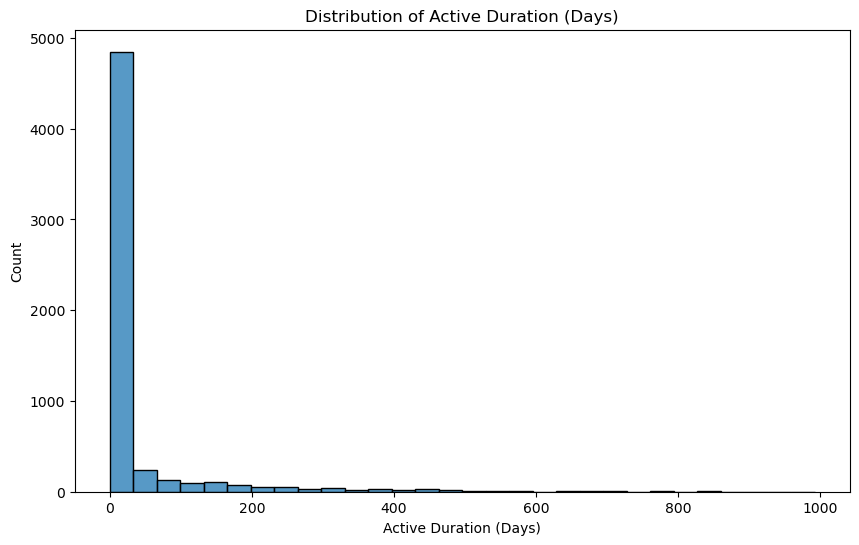

In [81]:
# First, let's look at the distribution of 'active_duration' in general
plt.figure(figsize=(10, 6))
sns.histplot(brands_data_df['active_duration'], kde=False, bins=30)
plt.title('Distribution of Active Duration (Days)')
plt.xlabel('Active Duration (Days)')
plt.ylabel('Count')
plt.show()

**Observations:**
- The distribution demonstrates a notable right-skew. This suggests a large proportion of brands have a short active duration, with a significant peak at around 0 days.
- It can be inferred that many brands cease activity shortly after creation, indicating an area that may benefit from improved user retention strategies.

### Boxplot of Active Duration by Plan Level

The boxplot illustrates the 'active_duration' distribution across the different plan levels.

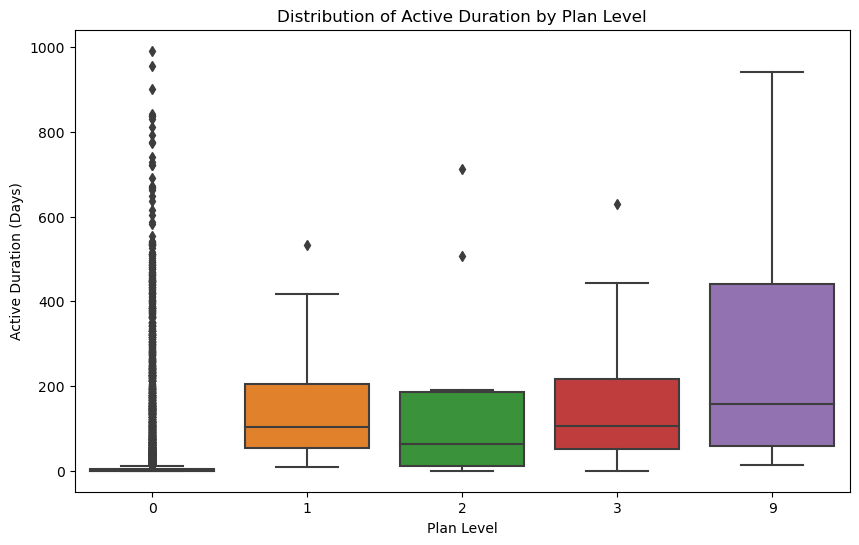

In [82]:
# Now, let's look at the distribution of 'active_duration' for each plan level using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='planLevel', y='active_duration', data=brands_data_df)
plt.title('Distribution of Active Duration by Plan Level')
plt.xlabel('Plan Level')
plt.ylabel('Active Duration (Days)')
plt.show()


**Observations:**
- There's a general trend of increasing median active duration with higher plan levels, suggesting brands with longer active durations are more likely to subscribe to higher-tier plans.
- Despite this trend, each plan level shows a significant range of active durations (as indicated by the length of the boxes and whiskers), including numerous outliers. This suggests substantial variation within each plan level.
- Plan Level 0 stands out with a small interquartile range but a high number of outliers, indicating that while many brands at this level have a short active duration, a significant portion remain active for much longer periods.

These insights can provide valuable context for developing strategies for role-specific features, user retention, and conversion to higher subscription levels.

In [83]:
# Calculate the average 'active_duration' for each 'planLevel'
average_active_duration_by_planLevel = brands_data_df.groupby('planLevel')['active_duration'].mean()

average_active_duration_by_planLevel


planLevel
0     31.990982
1    172.375000
2    174.800000
3    145.206897
9    284.666667
Name: active_duration, dtype: float64

- Plan Level 0 (Free Subscription): Approximately 32 days

- Plan Level 1 (Trial Subscription): Approximately 172 days

- Plan Level 2 (Paid Subscription): Approximately 175 days

- Plan Level 3: Approximately 145 days

- Plan Level 9: Approximately 285 days

## Analysis of Role Distribution Across Plan Levels

Next, we'll examine the distribution of roles across different plan levels to identify user patterns associated with each plan.

We will calculate the count of each role at each plan level, and visualize the top 10 roles per plan level using horizontal bar plots. Each subplot corresponds to a different plan level, with bars representing role counts, sorted for easy identification of prevalent roles.


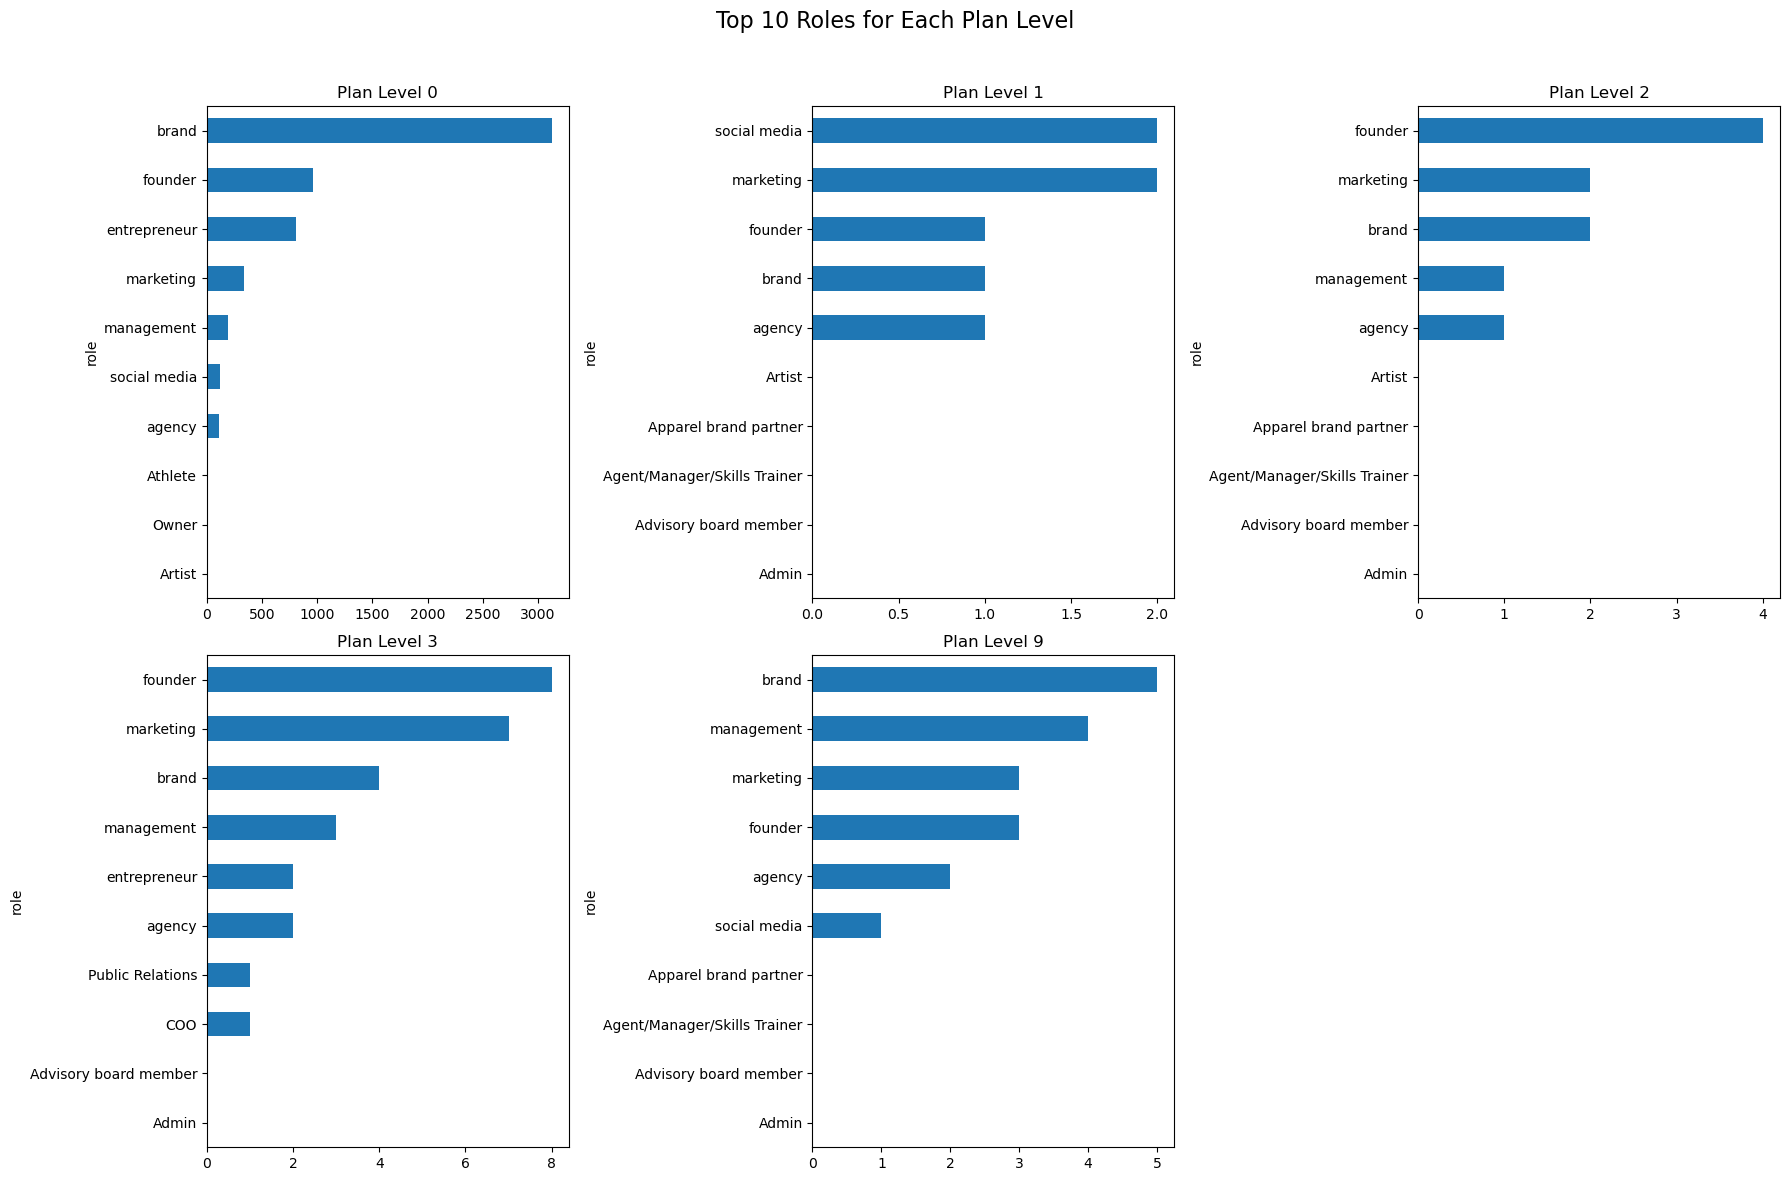

In [84]:
# Calculate the count of each role at each plan level
role_planLevel_counts = brands_data_df.groupby('planLevel')['role'].value_counts().unstack(fill_value=0)

# Create a horizontal bar plot for each plan level
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, planLevel in enumerate(role_planLevel_counts.index):
    # Select the top 10 roles
    top_10_roles = role_planLevel_counts.loc[planLevel].nlargest(10)
    
    # Plot the horizontal bar plot
    top_10_roles.sort_values().plot(kind='barh', ax=axes[i])
    axes[i].set_title(f'Plan Level {planLevel}')

# Remove the unused subplot
axes[-1].axis('off')

# Add a title for the entire figure
fig.suptitle('Top 10 Roles for Each Plan Level', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


# Role Distribution Across Plan Levels

The subplots in the following figure represent different plan levels. Each bar within a subplot indicates the count of a specific role. The roles are sorted by count, which enables easy identification of the most common roles within each plan level.

## Key Observations:

1. **Brand**: This role is the most prevalent across all plan levels. It ranks first in Plan Levels 0 and 9 and consistently appears within the top 4 roles in Plan Levels 1, 2, and 3.

2. **Founder**: This role leads in Plan Levels 2 and 3 and consistently appears within the top 4 roles in other plan levels.

3. **Marketing**: This role maintains a consistent presence across all plan levels, reliably staying within the top 4 roles and securing the 2nd or 3rd place in several instances.

4. **Social Media**: This role takes the first place in Plan Level 1 and makes it to the top 6 in Plan Levels 0 and 9. However, it does not appear within the top 10 in Plan Levels 2 and 3.

5. **Agency**: This role consistently appears in all plan levels, always ranking within the top 6 or higher.

The above insights underscore the diverse user base across different plan levels and highlight the dominant roles within each level. Understanding this distribution can provide valuable context for designing role-specific features or marketing strategies.



# Analysis of BANT Scores


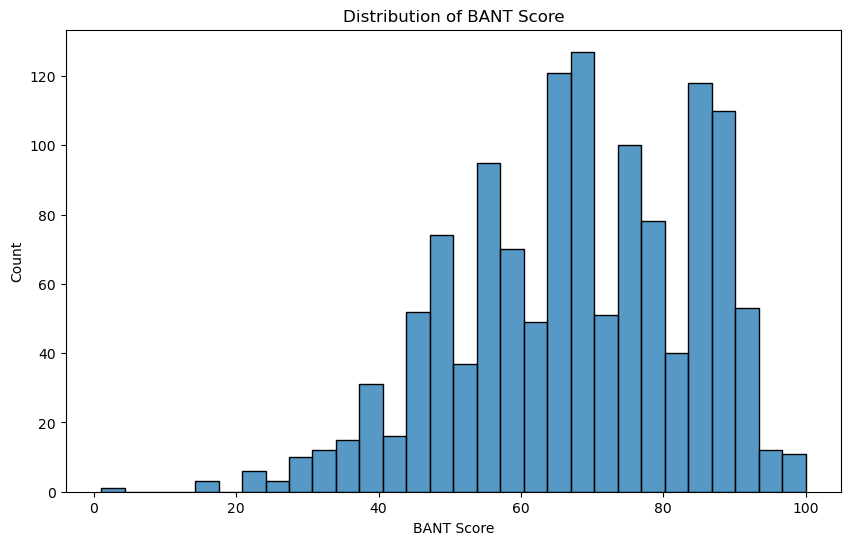

In [85]:
# Create a new dataframe that only includes brands with a BANT score
brands_with_bant = brands_data_df[brands_data_df['bantScore'].notna()]

# Now, let's look at the distribution of 'bantScore' in general
plt.figure(figsize=(10, 6))
sns.histplot(brands_with_bant['bantScore'], kde=False, bins=30)
plt.title('Distribution of BANT Score')
plt.xlabel('BANT Score')
plt.ylabel('Count')
plt.show()




## Histogram of BANT Scores

The histogram illustrates the distribution of BANT scores among brands with a recorded score. The distribution is right-skewed, indicating a concentration of brands with BANT scores in the 60-80 range. This suggests that among brands with a recorded BANT score, most have relatively high scores. There are also some brands with a BANT score of zero, which could be due to these brands not meeting any of the criteria used to calculate the score.

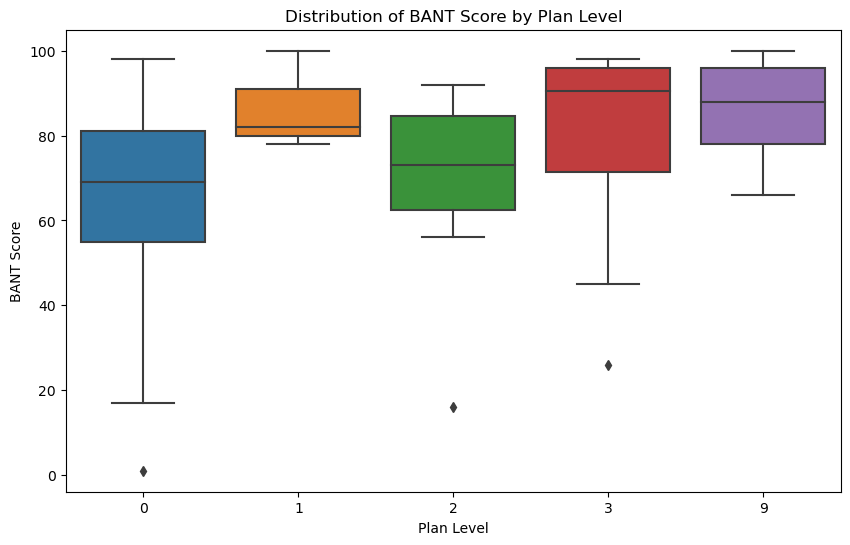

In [86]:
# Now, let's look at the distribution of 'bantScore' for each plan level using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='planLevel', y='bantScore', data=brands_with_bant)
plt.title('Distribution of BANT Score by Plan Level')
plt.xlabel('Plan Level')
plt.ylabel('BANT Score')
plt.show()

## Boxplot of BANT Scores by Plan Level

The boxplots display the distribution of BANT scores across different plan levels:

- **Plan Level 0:** Brands at this level exhibit a wide range of BANT scores, with a median around 70, indicating a significant variability.
- **Plan Level 1:** Brands at this level generally have higher BANT scores, with a median between 80 and 85.
- **Plan Level 2:** The median BANT score for brands at this level is around 75.
- **Plan Level 3:** Brands at this level tend to have higher BANT scores, with a median of around 90.
- **Plan Level 9:** Brands at this level have a high median BANT score between 85 and 90, with less variability compared to other levels.

The boxplots reveal a generally upward trend in median BANT scores as plan levels increase, although the relationship is not strictly linear. There's a considerable variability in BANT scores within each plan level, indicating that BANT score alone might not be a strong predictor of plan level. Other factors not captured in this data might also play significant roles in determining a brand's plan level.


# OpenSponsorship Brand Data Analysis Report

The analysis provides key insights on brands using OpenSponsorship, focusing on role distribution, active duration, and BANT scores across different plan levels. 

## Role Distribution Across Plan Levels

- 'Brand' is the most common role across all plan levels, indicating a strong platform usage by brands. Other dominant roles include 'Founder', 'Marketing', 'Social Media', and 'Agency'. 

## Active Duration

- Shorter active duration is observed at Plan Level 0, indicating potential for improved user retention strategies. 
- Median active duration generally increases with higher plan levels, although each level exhibits significant variation. 

## BANT Scores

- Brands with recorded BANT scores typically have high scores in the 60-80 range. 
- Significant variability in BANT scores within each plan level suggests that BANT score alone might not be a strong predictor of plan level.

## Dataset Limitations

- Significant missing values in 'companySize', 'bantScore', and 'country' limit the analysis scope.
- Plan levels in the dataset do not directly correspond to OpenSponsorship's subscription plans, causing interpretative difficulties.

## Additional Data Point Suggestions

- Engagement Metrics (e.g., number of proposals sent, campaigns published) could enhance understanding of a brand's platform engagement.
- Time-stamped user activity could provide insights into usage patterns and key engagement or churn signals. 
- User feedback data could offer insights into user satisfaction and potential improvement areas.

By considering these insights and addressing limitations, OpenSponsorship can refine its strategies for optimizing services and marketing approaches.
